In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder,MinMaxScaler

In [9]:
import matplotlib.pyplot as plt  # Para graficar
import seaborn as sns  # Para mejorar las visualizaciones

In [ ]:
from IPython.display import FileLink, display

In [10]:
#Opción falta RAM
#!pip install pyarrow

In [11]:
#!pip install dask pyarrow fastparquet

#Data Loading

In [12]:
# conexion a drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
df_daily_calendar=pd.read_csv("/content/drive/MyDrive/Grupo_TFM/DataFrame/data_dsmarket/daily_calendar_with_events.csv")
df_item_prices=pd.read_csv("/content/drive/MyDrive/Grupo_TFM/DataFrame/data_dsmarket/item_prices.csv")
df_item_sales=pd.read_csv("/content/drive/MyDrive/Grupo_TFM/DataFrame/data_dsmarket/item_sales.csv")

In [14]:
# df_daily_calendar= pd.read_csv("daily_calendar_with_events.csv")
# df_item_prices=pd.read_csv("item_prices.csv")
# df_item_sales=pd.read_csv("item_sales.csv")

In [15]:
df_item_sales.head()

,id,item,category,department,store,store_code,region,d_1,d_2,d_3,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,ACCESORIES_1_001_NYC_1,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,0,0,0,...,1,3,0,1,1,1,3,0,1,1
1,ACCESORIES_1_002_NYC_1,ACCESORIES_1_002,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,ACCESORIES_1_003_NYC_1,ACCESORIES_1_003,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,0,0,0,...,2,1,2,1,1,1,0,1,1,1
3,ACCESORIES_1_004_NYC_1,ACCESORIES_1_004,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,0,0,0,...,1,0,5,4,1,0,1,3,7,2
4,ACCESORIES_1_005_NYC_1,ACCESORIES_1_005,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,0,0,0,...,2,1,1,0,1,1,2,2,2,4


In [16]:
df_seleccionado = df_item_sales[['store_code', 'store']].drop_duplicates()
print(df_seleccionado)

      store_code              store
0          NYC_1  Greenwich_Village
3049       NYC_2             Harlem
6098       NYC_3            Tribeca
9147       NYC_4           Brooklyn
12196      BOS_1          South_End
15245      BOS_2            Roxbury
18294      BOS_3           Back_Bay
21343      PHI_1    Midtown_Village
24392      PHI_2           Yorktown
27441      PHI_3      Queen_Village


In [17]:
df_item_sales

,id,item,category,department,store,store_code,region,d_1,d_2,d_3,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,ACCESORIES_1_001_NYC_1,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,0,0,0,...,1,3,0,1,1,1,3,0,1,1
1,ACCESORIES_1_002_NYC_1,ACCESORIES_1_002,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,ACCESORIES_1_003_NYC_1,ACCESORIES_1_003,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,0,0,0,...,2,1,2,1,1,1,0,1,1,1
3,ACCESORIES_1_004_NYC_1,ACCESORIES_1_004,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,0,0,0,...,1,0,5,4,1,0,1,3,7,2
4,ACCESORIES_1_005_NYC_1,ACCESORIES_1_005,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,0,0,0,...,2,1,1,0,1,1,2,2,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30485,SUPERMARKET_3_823_PHI_3,SUPERMARKET_3_823,SUPERMARKET,SUPERMARKET_3,Queen_Village,PHI_3,Philadelphia,0,0,2,...,2,0,0,0,0,0,1,0,0,1
30486,SUPERMARKET_3_824_PHI_3,SUPERMARKET_3_824,SUPERMARKET,SUPERMARKET_3,Queen_Village,PHI_3,Philadelphia,0,0,0,...,0,0,0,0,0,0,0,0,1,0
30487,SUPERMARKET_3_825_PHI_3,SUPERMARKET_3_825,SUPERMARKET,SUPERMARKET_3,Queen_Village,PHI_3,Philadelphia,0,6,0,...,2,1,0,2,0,1,0,0,1,0
30488,SUPERMARKET_3_826_PHI_3,SUPERMARKET_3_826,SUPERMARKET,SUPERMARKET_3,Queen_Village,PHI_3,Philadelphia,0,0,0,...,0,0,1,0,0,1,0,3,1,3


In [18]:
df_item_prices.head(5)

,item,category,store_code,yearweek,sell_price
0,ACCESORIES_1_001,ACCESORIES,NYC_1,201328.0,12.7414
1,ACCESORIES_1_001,ACCESORIES,NYC_1,201329.0,12.7414
2,ACCESORIES_1_001,ACCESORIES,NYC_1,201330.0,10.9858
3,ACCESORIES_1_001,ACCESORIES,NYC_1,201331.0,10.9858
4,ACCESORIES_1_001,ACCESORIES,NYC_1,201332.0,10.9858


In [19]:
df_daily_calendar.head()

,date,weekday,weekday_int,d,event
0,2011-01-29,Saturday,1,d_1,NaN
1,2011-01-30,Sunday,2,d_2,NaN
2,2011-01-31,Monday,3,d_3,NaN
3,2011-02-01,Tuesday,4,d_4,NaN
4,2011-02-02,Wednesday,5,d_5,NaN


## EDA

##  Calendar Table Analysis

In [20]:
df_daily_calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1913 entries, 0 to 1912
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         1913 non-null   object
 1   weekday      1913 non-null   object
 2   weekday_int  1913 non-null   int64 
 3   d            1913 non-null   object
 4   event        26 non-null     object
dtypes: int64(1), object(4)
memory usage: 74.9+ KB


In [21]:
df_daily_calendar.head(10)
#weeks starts on Saturdays

,date,weekday,weekday_int,d,event
0,2011-01-29,Saturday,1,d_1,NaN
1,2011-01-30,Sunday,2,d_2,NaN
2,2011-01-31,Monday,3,d_3,NaN
3,2011-02-01,Tuesday,4,d_4,NaN
4,2011-02-02,Wednesday,5,d_5,NaN
5,2011-02-03,Thursday,6,d_6,NaN
6,2011-02-04,Friday,7,d_7,NaN
7,2011-02-05,Saturday,1,d_8,NaN
8,2011-02-06,Sunday,2,d_9,SuperBowl
9,2011-02-07,Monday,3,d_10,NaN


In [22]:
df_daily_calendar.tail(10)

,date,weekday,weekday_int,d,event
1903,2016-04-15,Friday,7,d_1904,NaN
1904,2016-04-16,Saturday,1,d_1905,NaN
1905,2016-04-17,Sunday,2,d_1906,NaN
1906,2016-04-18,Monday,3,d_1907,NaN
1907,2016-04-19,Tuesday,4,d_1908,NaN
1908,2016-04-20,Wednesday,5,d_1909,NaN
1909,2016-04-21,Thursday,6,d_1910,NaN
1910,2016-04-22,Friday,7,d_1911,NaN
1911,2016-04-23,Saturday,1,d_1912,NaN
1912,2016-04-24,Sunday,2,d_1913,NaN


In [23]:
df_daily_calendar.isnull().sum()

,0
date,0
weekday,0
weekday_int,0
d,0
event,1887


There is a high number of nulls since the event is only marked on the day it occurs, even though the promotion period is longer.


In [24]:
df_daily_calendar['event'].value_counts() #different events

,count
event,
SuperBowl,6
Ramadan starts,5
Thanksgiving,5
NewYear,5
Easter,5


These values make sense if we look at the events that occur from 2011 to April 2016.


In [25]:
# Changing to datetime
df_daily_calendar['date']=pd.to_datetime(df_daily_calendar['date'])

In [26]:
#checking the date range
df_daily_calendar['date'].min(),df_daily_calendar['date'].max()

(Timestamp('2011-01-29 00:00:00'), Timestamp('2016-04-24 00:00:00'))

In [27]:
# checking for duplicates
df_daily_calendar.duplicated().sum()

np.int64(0)

## Prices Table Analysis

In [28]:
df_item_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6965706 entries, 0 to 6965705
Data columns (total 5 columns):
 #   Column      Dtype  
---  ------      -----  
 0   item        object 
 1   category    object 
 2   store_code  object 
 3   yearweek    float64
 4   sell_price  float64
dtypes: float64(2), object(3)
memory usage: 265.7+ MB


In [29]:
df_item_prices.head(10)

,item,category,store_code,yearweek,sell_price
0,ACCESORIES_1_001,ACCESORIES,NYC_1,201328.0,12.7414
1,ACCESORIES_1_001,ACCESORIES,NYC_1,201329.0,12.7414
2,ACCESORIES_1_001,ACCESORIES,NYC_1,201330.0,10.9858
3,ACCESORIES_1_001,ACCESORIES,NYC_1,201331.0,10.9858
4,ACCESORIES_1_001,ACCESORIES,NYC_1,201332.0,10.9858
5,ACCESORIES_1_001,ACCESORIES,NYC_1,201333.0,10.9858
6,ACCESORIES_1_001,ACCESORIES,NYC_1,201334.0,10.9858
7,ACCESORIES_1_001,ACCESORIES,NYC_1,201335.0,10.9858
8,ACCESORIES_1_001,ACCESORIES,NYC_1,201336.0,10.9858
9,ACCESORIES_1_001,ACCESORIES,NYC_1,201337.0,10.9858


In [30]:
df_item_prices.tail(10)

,item,category,store_code,yearweek,sell_price
6965696,SUPERMARKET_3_827,SUPERMARKET,PHI_3,201616.0,1.2
6965697,SUPERMARKET_3_827,SUPERMARKET,PHI_3,201617.0,1.2
6965698,SUPERMARKET_3_827,SUPERMARKET,PHI_3,NaN,1.2
6965699,SUPERMARKET_3_827,SUPERMARKET,PHI_3,NaN,1.2
6965700,SUPERMARKET_3_827,SUPERMARKET,PHI_3,NaN,1.2
6965701,SUPERMARKET_3_827,SUPERMARKET,PHI_3,NaN,1.2
6965702,SUPERMARKET_3_827,SUPERMARKET,PHI_3,NaN,1.2
6965703,SUPERMARKET_3_827,SUPERMARKET,PHI_3,NaN,1.2
6965704,SUPERMARKET_3_827,SUPERMARKET,PHI_3,NaN,1.2
6965705,SUPERMARKET_3_827,SUPERMARKET,PHI_3,NaN,1.2


In [31]:
df_item_prices['sell_price'].describe()

,sell_price
count,6.965706e+06
mean,5.518273e+00
std,4.387861e+00
min,1.200000e-02
25%,2.620100e+00
50%,4.200000e+00
75%,7.176000e+00
max,1.341500e+02


In [32]:
df_item_prices['sell_price'].agg(['min', 'max'])

,sell_price
min,0.012
max,134.150


In [33]:
unique_sell_prices = df_item_prices['sell_price'].unique()
print(unique_sell_prices)

[12.7414 10.9858 11.1454 ...  4.956   1.812   2.28  ]


In [34]:
# checking nulls
df_item_prices.isnull().sum()

,0
item,0
category,0
store_code,0
yearweek,243920
sell_price,0


In [35]:
#checking duplicated
df_item_prices[df_item_prices.duplicated(keep=False)]

,item,category,store_code,yearweek,sell_price
149,ACCESORIES_1_001,ACCESORIES,NYC_1,NaN,11.1454
150,ACCESORIES_1_001,ACCESORIES,NYC_1,NaN,11.1454
151,ACCESORIES_1_001,ACCESORIES,NYC_1,NaN,11.1454
152,ACCESORIES_1_001,ACCESORIES,NYC_1,NaN,11.1454
153,ACCESORIES_1_001,ACCESORIES,NYC_1,NaN,11.1454
...,...,...,...,...,...
6965701,SUPERMARKET_3_827,SUPERMARKET,PHI_3,NaN,1.2000
6965702,SUPERMARKET_3_827,SUPERMARKET,PHI_3,NaN,1.2000
6965703,SUPERMARKET_3_827,SUPERMARKET,PHI_3,NaN,1.2000
6965704,SUPERMARKET_3_827,SUPERMARKET,PHI_3,NaN,1.2000


Most duplicate values are because they don't have an associated "yearweek" value that can distinguish them - 243495 out of 242920 total. We check if this happens in a specific store or a specific category

In [36]:
df_item_prices.nunique()

,0
item,3049
category,3
store_code,10
yearweek,279
sell_price,1892


In [37]:
# Count NaN values per store_code
df_item_prices["yearweek"].isna().groupby(df_item_prices['store_code']).sum()


,yearweek
store_code,
BOS_1,24392
BOS_2,24392
BOS_3,24392
NYC_1,24392
NYC_2,24392
NYC_3,24392
NYC_4,24392
PHI_1,24392
PHI_2,24392


In [38]:
df_item_prices.groupby('store_code')['yearweek'].agg(['min', 'max']).reset_index()

,store_code,min,max
0,BOS_1,201105.0,201617.0
1,BOS_2,201105.0,201617.0
2,BOS_3,201105.0,201617.0
3,NYC_1,201105.0,201617.0
4,NYC_2,201105.0,201617.0
5,NYC_3,201105.0,201617.0
6,NYC_4,201105.0,201617.0
7,PHI_1,201105.0,201617.0
8,PHI_2,201105.0,201617.0
9,PHI_3,201105.0,201617.0


Interesting that the value is the same across all stores. Perhaps it's always the same product? or the same time period?

In [39]:
# Contar NaN values por catogory
df_item_prices["yearweek"].isna().groupby(df_item_prices['category']).sum()


,yearweek
category,
ACCESORIES,45200
HOME_&_GARDEN,83760
SUPERMARKET,114960


In [40]:
#We use the following function to identify the first null value in the yearweek column, which we'll use subsequently

def primer_numero_no_nulo(df, columna):
   """
  Find the first non-null number in a DataFrame column.
  Args:
   df (pd.DataFrame): The DataFrame to analyze.
   columna (str): The name of the column to analyze.
  Returns:
   The first non-null number found in the column.
   """
    for valor in df[columna]:
        if pd.notnull(valor):
            return valor
    return None

primer_numero = primer_numero_no_nulo(df_item_prices, 'yearweek')
print(f"The firt no null in 'yearweek'column is: {primer_numero}")

The firt no null in 'yearweek'column is: 201328.0


In [41]:
# Display records where yearweek is null
prices_null=df_item_prices[df_item_prices['yearweek'].isnull()]
prices_null

,item,category,store_code,yearweek,sell_price
149,ACCESORIES_1_001,ACCESORIES,NYC_1,NaN,11.1454
150,ACCESORIES_1_001,ACCESORIES,NYC_1,NaN,11.1454
151,ACCESORIES_1_001,ACCESORIES,NYC_1,NaN,11.1454
152,ACCESORIES_1_001,ACCESORIES,NYC_1,NaN,11.1454
153,ACCESORIES_1_001,ACCESORIES,NYC_1,NaN,11.1454
...,...,...,...,...,...
6965701,SUPERMARKET_3_827,SUPERMARKET,PHI_3,NaN,1.2000
6965702,SUPERMARKET_3_827,SUPERMARKET,PHI_3,NaN,1.2000
6965703,SUPERMARKET_3_827,SUPERMARKET,PHI_3,NaN,1.2000
6965704,SUPERMARKET_3_827,SUPERMARKET,PHI_3,NaN,1.2000


When does the first non-null start for ACCESSORIES_1_001?

In [42]:
prices_not_null=df_item_prices[(df_item_prices['yearweek'].notnull())&(df_item_prices['item']=='ACCESORIES_1_001')]
print(prices_not_null)

                     item    category store_code  yearweek  sell_price
0        ACCESORIES_1_001  ACCESORIES      NYC_1  201328.0     12.7414
1        ACCESORIES_1_001  ACCESORIES      NYC_1  201329.0     12.7414
2        ACCESORIES_1_001  ACCESORIES      NYC_1  201330.0     10.9858
3        ACCESORIES_1_001  ACCESORIES      NYC_1  201331.0     10.9858
4        ACCESORIES_1_001  ACCESORIES      NYC_1  201332.0     10.9858
...                   ...         ...        ...       ...         ...
6257100  ACCESORIES_1_001  ACCESORIES      PHI_3  201613.0     10.9858
6257101  ACCESORIES_1_001  ACCESORIES      PHI_3  201614.0     10.9858
6257102  ACCESORIES_1_001  ACCESORIES      PHI_3  201615.0     10.9858
6257103  ACCESORIES_1_001  ACCESORIES      PHI_3  201616.0     11.1454
6257104  ACCESORIES_1_001  ACCESORIES      PHI_3  201617.0     11.1454

[1478 rows x 5 columns]


For ACCESSORIES_1_001, the first non-null occurs at 201328.0. What happened between 201105.0 (first sales date) and this date? We'll verify this after joining the Calendar and Sales tables.

In [43]:
# Group by 'category' and aggregate to find the minimum and maximum 'yearweek' values
df_item_prices.groupby('category')['yearweek'].agg(['min', 'max']).reset_index()

,category,min,max
0,ACCESORIES,201105.0,201617.0
1,HOME_&_GARDEN,201105.0,201617.0
2,SUPERMARKET,201105.0,201617.0


No clear conclusion is reached. We verify what the yearweek values are in the prices table

In [44]:

df_item_prices["yearweek"].dropna().unique()


array([201328., 201329., 201330., 201331., 201332., 201333., 201334.,
       201335., 201336., 201337., 201338., 201339., 201340., 201341.,
       201342., 201343., 201344., 201345., 201346., 201347., 201348.,
       201349., 201350., 201351., 201352., 201400., 201401., 201402.,
       201403., 201404., 201405., 201406., 201407., 201408., 201409.,
       201410., 201411., 201412., 201413., 201414., 201415., 201416.,
       201417., 201418., 201419., 201420., 201421., 201422., 201423.,
       201424., 201425., 201426., 201427., 201428., 201429., 201430.,
       201431., 201432., 201433., 201434., 201435., 201436., 201437.,
       201438., 201439., 201440., 201441., 201442., 201443., 201444.,
       201445., 201446., 201447., 201448., 201449., 201450., 201451.,
       201452., 201500., 201501., 201502., 201503., 201504., 201505.,
       201506., 201507., 201508., 201509., 201510., 201511., 201512.,
       201513., 201514., 201515., 201516., 201517., 201518., 201519.,
       201520., 2015

Doesn't return unique values that don't have month and week assigned, so we conclude that all items have gaps in the yearweek column


We examine all years for week 53

In [45]:
# Check if week 53 exists for each year with record count
years = [2011, 2012, 2013, 2014, 2015, 2016]

for year in years:
    week_53 = year * 100 + 53  # Create yearweek format (e.g., 201153)
    records = df_item_prices[df_item_prices["yearweek"] == week_53]
    count = len(records)
    exists = count > 0
    print(f"Year {year} - Week 53 exists: {exists} ({count} records)")

Year 2011 - Week 53 exists: False (0 records)
Year 2012 - Week 53 exists: True (21894 records)
Year 2013 - Week 53 exists: False (0 records)
Year 2014 - Week 53 exists: False (0 records)
Year 2015 - Week 53 exists: False (0 records)
Year 2016 - Week 53 exists: False (0 records)


There are nonsensical values like 201400, 201500, 201600 as there is no actual week 00. Let's analyze what's in these weeks

In [46]:
df_item_prices[(df_item_prices["yearweek"]==201300) & (df_item_prices["item"]=="ACCESORIES_1_002")]

,item,category,store_code,yearweek,sell_price
239,ACCESORIES_1_002,ACCESORIES,NYC_1,201300.0,5.2801
711325,ACCESORIES_1_002,ACCESORIES,NYC_2,201300.0,5.2801
1360327,ACCESORIES_1_002,ACCESORIES,NYC_3,201300.0,5.2801
2066896,ACCESORIES_1_002,ACCESORIES,NYC_4,201300.0,5.2801
2758289,ACCESORIES_1_002,ACCESORIES,BOS_1,201300.0,5.2801
3470799,ACCESORIES_1_002,ACCESORIES,BOS_2,201300.0,5.2801
4184774,ACCESORIES_1_002,ACCESORIES,BOS_3,201300.0,5.2801
4888457,ACCESORIES_1_002,ACCESORIES,PHI_1,201300.0,5.2801
5566664,ACCESORIES_1_002,ACCESORIES,PHI_2,201300.0,5.2801
6257210,ACCESORIES_1_002,ACCESORIES,PHI_3,201300.0,5.2801


In [47]:
df_item_prices[(df_item_prices["yearweek"]==201252) & (df_item_prices["item"]=="ACCESORIES_1_002")]

,item,category,store_code,yearweek,sell_price
237,ACCESORIES_1_002,ACCESORIES,NYC_1,201252.0,5.2801
711323,ACCESORIES_1_002,ACCESORIES,NYC_2,201252.0,5.2801
1360325,ACCESORIES_1_002,ACCESORIES,NYC_3,201252.0,5.2801
2066894,ACCESORIES_1_002,ACCESORIES,NYC_4,201252.0,5.2801
2758287,ACCESORIES_1_002,ACCESORIES,BOS_1,201252.0,5.2801
3470797,ACCESORIES_1_002,ACCESORIES,BOS_2,201252.0,5.2801
4184772,ACCESORIES_1_002,ACCESORIES,BOS_3,201252.0,5.2801
4888455,ACCESORIES_1_002,ACCESORIES,PHI_1,201252.0,5.2801
5566662,ACCESORIES_1_002,ACCESORIES,PHI_2,201252.0,5.2801
6257208,ACCESORIES_1_002,ACCESORIES,PHI_3,201252.0,5.2801


In [48]:
df_item_prices[(df_item_prices["yearweek"]==201301) & (df_item_prices["item"]=="ACCESORIES_1_002")]

,item,category,store_code,yearweek,sell_price
240,ACCESORIES_1_002,ACCESORIES,NYC_1,201301.0,5.2801
711326,ACCESORIES_1_002,ACCESORIES,NYC_2,201301.0,5.2801
1360328,ACCESORIES_1_002,ACCESORIES,NYC_3,201301.0,5.2801
2066897,ACCESORIES_1_002,ACCESORIES,NYC_4,201301.0,5.2801
2758290,ACCESORIES_1_002,ACCESORIES,BOS_1,201301.0,5.2801
3470800,ACCESORIES_1_002,ACCESORIES,BOS_2,201301.0,5.2801
4184775,ACCESORIES_1_002,ACCESORIES,BOS_3,201301.0,5.2801
4888458,ACCESORIES_1_002,ACCESORIES,PHI_1,201301.0,5.2801
5566665,ACCESORIES_1_002,ACCESORIES,PHI_2,201301.0,5.2801
6257211,ACCESORIES_1_002,ACCESORIES,PHI_3,201301.0,5.2801


We'll create a yearweek column in the calendar and check if any of these values are missing from prices. The initial hypothesis stated in the project specifications is: "price for the product "item" for the period in "yearweek". Prices are provided per week (average across 7 days). If not available there were no sales for the product during that week."
The NaN values should appear in the prices column, not the week column.


<Axes: xlabel='sell_price', ylabel='Count'>

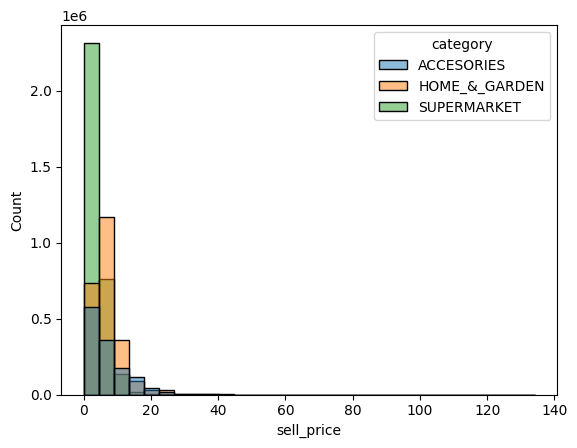

In [49]:
sns.histplot(data=df_item_prices, x="sell_price",  color="yellowgreen", hue="category", bins=30)
#Histogram to analyze sell_price as it's numeric, we can understand the price distribution across products

The majority of data falls within the 0 to 20 range, with a very sharp peak in the initial values. There are some values very distant from the rest, with selling prices exceeding 40.
Do low-cost products dominate sales? Poorly entered data or outliers to examine. A small group of premium or specialty products with higher prices.

## Análisis inicial tabla sales

In [50]:
df_item_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30490 entries, 0 to 30489
Columns: 1920 entries, id to d_1913
dtypes: int64(1913), object(7)
memory usage: 446.6+ MB


In [51]:
df_item_sales.head(10)

,id,item,category,department,store,store_code,region,d_1,d_2,d_3,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,ACCESORIES_1_001_NYC_1,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,0,0,0,...,1,3,0,1,1,1,3,0,1,1
1,ACCESORIES_1_002_NYC_1,ACCESORIES_1_002,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,ACCESORIES_1_003_NYC_1,ACCESORIES_1_003,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,0,0,0,...,2,1,2,1,1,1,0,1,1,1
3,ACCESORIES_1_004_NYC_1,ACCESORIES_1_004,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,0,0,0,...,1,0,5,4,1,0,1,3,7,2
4,ACCESORIES_1_005_NYC_1,ACCESORIES_1_005,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,0,0,0,...,2,1,1,0,1,1,2,2,2,4
5,ACCESORIES_1_006_NYC_1,ACCESORIES_1_006,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,0,0,0,...,0,1,0,1,0,0,0,2,0,0
6,ACCESORIES_1_007_NYC_1,ACCESORIES_1_007,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,0,0,0,...,0,0,0,1,0,1,0,0,1,1
7,ACCESORIES_1_008_NYC_1,ACCESORIES_1_008,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,12,15,0,...,0,0,1,37,3,4,6,3,2,1
8,ACCESORIES_1_009_NYC_1,ACCESORIES_1_009,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,2,0,7,...,0,0,1,1,6,0,0,0,0,0
9,ACCESORIES_1_010_NYC_1,ACCESORIES_1_010,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,0,0,1,...,1,0,0,0,0,0,0,2,0,2


In [52]:
df_item_sales.tail(10)

,id,item,category,department,store,store_code,region,d_1,d_2,d_3,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
30480,SUPERMARKET_3_818_PHI_3,SUPERMARKET_3_818,SUPERMARKET,SUPERMARKET_3,Queen_Village,PHI_3,Philadelphia,0,0,0,...,3,0,2,1,4,4,2,0,3,1
30481,SUPERMARKET_3_819_PHI_3,SUPERMARKET_3_819,SUPERMARKET,SUPERMARKET_3,Queen_Village,PHI_3,Philadelphia,14,11,5,...,5,5,0,4,1,1,3,1,0,2
30482,SUPERMARKET_3_820_PHI_3,SUPERMARKET_3_820,SUPERMARKET,SUPERMARKET_3,Queen_Village,PHI_3,Philadelphia,1,1,1,...,1,1,0,3,0,1,3,6,0,1
30483,SUPERMARKET_3_821_PHI_3,SUPERMARKET_3_821,SUPERMARKET,SUPERMARKET_3,Queen_Village,PHI_3,Philadelphia,0,0,0,...,3,2,1,0,2,0,0,0,4,0
30484,SUPERMARKET_3_822_PHI_3,SUPERMARKET_3_822,SUPERMARKET,SUPERMARKET_3,Queen_Village,PHI_3,Philadelphia,4,4,2,...,0,4,2,4,1,0,2,3,2,1
30485,SUPERMARKET_3_823_PHI_3,SUPERMARKET_3_823,SUPERMARKET,SUPERMARKET_3,Queen_Village,PHI_3,Philadelphia,0,0,2,...,2,0,0,0,0,0,1,0,0,1
30486,SUPERMARKET_3_824_PHI_3,SUPERMARKET_3_824,SUPERMARKET,SUPERMARKET_3,Queen_Village,PHI_3,Philadelphia,0,0,0,...,0,0,0,0,0,0,0,0,1,0
30487,SUPERMARKET_3_825_PHI_3,SUPERMARKET_3_825,SUPERMARKET,SUPERMARKET_3,Queen_Village,PHI_3,Philadelphia,0,6,0,...,2,1,0,2,0,1,0,0,1,0
30488,SUPERMARKET_3_826_PHI_3,SUPERMARKET_3_826,SUPERMARKET,SUPERMARKET_3,Queen_Village,PHI_3,Philadelphia,0,0,0,...,0,0,1,0,0,1,0,3,1,3
30489,SUPERMARKET_3_827_PHI_3,SUPERMARKET_3_827,SUPERMARKET,SUPERMARKET_3,Queen_Village,PHI_3,Philadelphia,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
df_item_sales.isnull().sum() # Which columns are with nulls?

,0
id,0
item,0
category,0
department,0
store,0
...,...
d_1909,0
d_1910,0
d_1911,0
d_1912,0


In [54]:
df_item_sales.isnull().sum().any() # crosscheck


np.False_

In [55]:
df_item_sales.duplicated().sum()
# Verify that there are no columns with NaN

np.int64(0)

# JOIN TABLAS

Goal: Merge the three tables into a single one and understand what the nulls in yearweek of prices represent. We maintain the hypothesis that if yearweek is empty, there were no sales that wee



## Prework tabla calendar

## Lógica yearweek

1. We set up a new dataset with the data we will need for the join

In [56]:
calendar= df_daily_calendar.copy()

In [57]:
calendar['date'] = pd.to_datetime(calendar['date']) # pasamos a tipo date
calendar['year'] = calendar['date'].dt.year #separamos el año
calendar['month'] = calendar['date'].dt.month # separamos el mes
calendar['day'] = calendar['date'].dt.day # separamos el dia
print(calendar)

           date    weekday  weekday_int       d event  year  month  day
0    2011-01-29   Saturday            1     d_1   NaN  2011      1   29
1    2011-01-30     Sunday            2     d_2   NaN  2011      1   30
2    2011-01-31     Monday            3     d_3   NaN  2011      1   31
3    2011-02-01    Tuesday            4     d_4   NaN  2011      2    1
4    2011-02-02  Wednesday            5     d_5   NaN  2011      2    2
...         ...        ...          ...     ...   ...   ...    ...  ...
1908 2016-04-20  Wednesday            5  d_1909   NaN  2016      4   20
1909 2016-04-21   Thursday            6  d_1910   NaN  2016      4   21
1910 2016-04-22     Friday            7  d_1911   NaN  2016      4   22
1911 2016-04-23   Saturday            1  d_1912   NaN  2016      4   23
1912 2016-04-24     Sunday            2  d_1913   NaN  2016      4   24

[1913 rows x 8 columns]


2. We start by generating the yearweek column in calendar following the logic observed in prices.


First day of the week will always be Saturday.
Only one year has 53 weeks, 2012. To define it:

The last Saturday of 2012 has to be the start of week 53.


For the rest of the years we'll check which year each Saturday corresponds to and update the year and week calculation accordingly.

In [58]:
# Extract the year and weekday from the 'date' column
calendar['year'] = calendar['date'].dt.year
calendar['weekday'] = calendar['date'].dt.strftime('%A')

# Initialize variables
weekactual = 4
year_actual = calendar['year'].iloc[0]
calendar['yearweek'] = 0

# Loop DF:
for i in range(len(calendar)):
    #Check if the day is Saturday, if it is, increment the current week by 1
    if calendar.at[i, 'weekday'] == 'Saturday':
        weekactual += 1
        # If the year differs from the stored variable (is greater), reset the week variable and take the following year
        if calendar.at[i, 'year'] != year_actual:
            weekactual = 1
            year_actual = calendar.at[i, 'year']
        #If the day is above 29 and the month is December, increment the current week by 1 and update the year
        #This scenario will only be relevant for 2012, the only year that falls under this condition
        if calendar.at[i, 'day'] > 29 and calendar.at[i, 'month'] == 12:
            weekactual = 1
            year_actual+=1

    calendar.at[i, 'yearweek'] = int(f"{year_actual}{weekactual:02d}")
# Display the DataFrame to verify the changes
print(calendar.head(20))
print(calendar.tail(20))

         date    weekday  weekday_int     d      event  year  month  day  \
0  2011-01-29   Saturday            1   d_1        NaN  2011      1   29   
1  2011-01-30     Sunday            2   d_2        NaN  2011      1   30   
2  2011-01-31     Monday            3   d_3        NaN  2011      1   31   
3  2011-02-01    Tuesday            4   d_4        NaN  2011      2    1   
4  2011-02-02  Wednesday            5   d_5        NaN  2011      2    2   
5  2011-02-03   Thursday            6   d_6        NaN  2011      2    3   
6  2011-02-04     Friday            7   d_7        NaN  2011      2    4   
7  2011-02-05   Saturday            1   d_8        NaN  2011      2    5   
8  2011-02-06     Sunday            2   d_9  SuperBowl  2011      2    6   
9  2011-02-07     Monday            3  d_10        NaN  2011      2    7   
10 2011-02-08    Tuesday            4  d_11        NaN  2011      2    8   
11 2011-02-09  Wednesday            5  d_12        NaN  2011      2    9   
12 2011-02-1

Cross-validation of how weeks were created in the df - particularly week 53 which will span between two years. Week 53 should only exist for 2012

In [59]:
#Create a week column to cross-validate the assigned weeks
calendar['week'] = calendar['yearweek'].astype(str).str[-2:].astype(int)
calendar['week'].unique()

array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
       22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38,
       39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52,  1,  2,  3,
        4, 53])

In [60]:
calendar[calendar['week']==53]

,date,weekday,weekday_int,d,event,year,month,day,yearweek,week
700,2012-12-29,Saturday,1,d_701,NaN,2012,12,29,201253,53
701,2012-12-30,Sunday,2,d_702,NaN,2012,12,30,201253,53
702,2012-12-31,Monday,3,d_703,NaN,2012,12,31,201253,53
703,2013-01-01,Tuesday,4,d_704,NewYear,2013,1,1,201253,53
704,2013-01-02,Wednesday,5,d_705,NaN,2013,1,2,201253,53
705,2013-01-03,Thursday,6,d_706,NaN,2013,1,3,201253,53
706,2013-01-04,Friday,7,d_707,NaN,2013,1,4,201253,53


In [61]:
calendar[calendar['week']==52]

,date,weekday,weekday_int,d,event,year,month,day,yearweek,week
329,2011-12-24,Saturday,1,d_330,NaN,2011,12,24,201152,52
330,2011-12-25,Sunday,2,d_331,NaN,2011,12,25,201152,52
331,2011-12-26,Monday,3,d_332,NaN,2011,12,26,201152,52
332,2011-12-27,Tuesday,4,d_333,NaN,2011,12,27,201152,52
333,2011-12-28,Wednesday,5,d_334,NaN,2011,12,28,201152,52
334,2011-12-29,Thursday,6,d_335,NaN,2011,12,29,201152,52
335,2011-12-30,Friday,7,d_336,NaN,2011,12,30,201152,52
693,2012-12-22,Saturday,1,d_694,NaN,2012,12,22,201252,52
694,2012-12-23,Sunday,2,d_695,NaN,2012,12,23,201252,52
695,2012-12-24,Monday,3,d_696,NaN,2012,12,24,201252,52


In [63]:
calendar[calendar['d']=='d_337'] #Check the last day of 2011, which belongs to the 2012 weekly calendar.

,date,weekday,weekday_int,d,event,year,month,day,yearweek,week
336,2011-12-31,Saturday,1,d_337,NaN,2011,12,31,201201,1


In [64]:
calendar[calendar['yearweek']==201201]#Crosscheck

,date,weekday,weekday_int,d,event,year,month,day,yearweek,week
336,2011-12-31,Saturday,1,d_337,NaN,2011,12,31,201201,1
337,2012-01-01,Sunday,2,d_338,NewYear,2012,1,1,201201,1
338,2012-01-02,Monday,3,d_339,NaN,2012,1,2,201201,1
339,2012-01-03,Tuesday,4,d_340,NaN,2012,1,3,201201,1
340,2012-01-04,Wednesday,5,d_341,NaN,2012,1,4,201201,1
341,2012-01-05,Thursday,6,d_342,NaN,2012,1,5,201201,1
342,2012-01-06,Friday,7,d_343,NaN,2012,1,6,201201,1


In [65]:
calendar[calendar['yearweek']==201301] #Crosscheck

,date,weekday,weekday_int,d,event,year,month,day,yearweek,week
707,2013-01-05,Saturday,1,d_708,NaN,2013,1,5,201301,1
708,2013-01-06,Sunday,2,d_709,NaN,2013,1,6,201301,1
709,2013-01-07,Monday,3,d_710,NaN,2013,1,7,201301,1
710,2013-01-08,Tuesday,4,d_711,NaN,2013,1,8,201301,1
711,2013-01-09,Wednesday,5,d_712,NaN,2013,1,9,201301,1
712,2013-01-10,Thursday,6,d_713,NaN,2013,1,10,201301,1
713,2013-01-11,Friday,7,d_714,NaN,2013,1,11,201301,1


In [66]:
calendar[calendar['yearweek']==201401] #Crosscheck

,date,weekday,weekday_int,d,event,year,month,day,yearweek,week
1071,2014-01-04,Saturday,1,d_1072,NaN,2014,1,4,201401,1
1072,2014-01-05,Sunday,2,d_1073,NaN,2014,1,5,201401,1
1073,2014-01-06,Monday,3,d_1074,NaN,2014,1,6,201401,1
1074,2014-01-07,Tuesday,4,d_1075,NaN,2014,1,7,201401,1
1075,2014-01-08,Wednesday,5,d_1076,NaN,2014,1,8,201401,1
1076,2014-01-09,Thursday,6,d_1077,NaN,2014,1,9,201401,1
1077,2014-01-10,Friday,7,d_1078,NaN,2014,1,10,201401,1


There are fewer weeks created than those in the sales table. 276 created vs. 279 in prices.
The differences are based on the observations mentioned previously.

In [67]:
calendar.nunique()


,0
date,1913
weekday,7
weekday_int,7
d,1913
event,5
year,6
month,12
day,31
yearweek,274
week,53


3. We drop columns that don't add relevant information

In [68]:
calendar.drop(['weekday'], axis=1, inplace=True) # We drop the weekday column
calendar.drop(['week'], axis=1, inplace=True) # We drop the week column
calendar.drop(['date'], axis=1, inplace=True) # We drop the date column

In [69]:
calendar # crosscheck.

,weekday_int,d,event,year,month,day,yearweek
0,1,d_1,NaN,2011,1,29,201105
1,2,d_2,NaN,2011,1,30,201105
2,3,d_3,NaN,2011,1,31,201105
3,4,d_4,NaN,2011,2,1,201105
4,5,d_5,NaN,2011,2,2,201105
...,...,...,...,...,...,...,...
1908,5,d_1909,NaN,2016,4,20,201616
1909,6,d_1910,NaN,2016,4,21,201616
1910,7,d_1911,NaN,2016,4,22,201616
1911,1,d_1912,NaN,2016,4,23,201617


We'll assign the event value to the whole corresponding week. The hypothesis is that the event-related promotion runs for the entire week, not just a single day

In [70]:
# Function to fill NaN values in 'event' column based on 'yearweek' column
def fill_event_by_yearweek(df):
    # Group by 'yearweek' and propagate non-NaN values within each group
    calendar['event'] = calendar.groupby('yearweek')['event'].transform(lambda x: x.ffill().bfill())
    return df

# Apply the function to the DataFrame
calendar = fill_event_by_yearweek(calendar)

<ipython-input-70-f3ddf014bf5c>:4: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  calendar['event'] = calendar.groupby('yearweek')['event'].transform(lambda x: x.ffill().bfill())


In [71]:
calendar[calendar['yearweek']==201253]
#crosscheck

,weekday_int,d,event,year,month,day,yearweek
700,1,d_701,NewYear,2012,12,29,201253
701,2,d_702,NewYear,2012,12,30,201253
702,3,d_703,NewYear,2012,12,31,201253
703,4,d_704,NewYear,2013,1,1,201253
704,5,d_705,NewYear,2013,1,2,201253
705,6,d_706,NewYear,2013,1,3,201253
706,7,d_707,NewYear,2013,1,4,201253


In [72]:
#Fill the null values in the event column with "no_event
calendar['event'].fillna('no_event', inplace=True)

<ipython-input-72-28cfe44e1a2a>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  calendar['event'].fillna('no_event', inplace=True)


## Prework tabla prices

In [73]:
prices= df_item_prices.copy()


In [74]:
# Values list for verification
values_to_verify = [201300, 201400, 201500, 201600]

# Validate if the values are present in the 'yearweek' column
presents_values = prices['yearweek'].isin(values_to_verify )

# Present results
for value, presente in zip(values_to_verify , presents_values):
    print(f"The value {value} {'is' if presente else 'is not'} in the column 'yearweek'.")

El valor 201300 no está presente en la columna 'yearweek'.
El valor 201400 no está presente en la columna 'yearweek'.
El valor 201500 no está presente en la columna 'yearweek'.
El valor 201600 no está presente en la columna 'yearweek'.


## Prework tabla sales

Prior to joining the tables, we must reshape the sales table from each day (d_1, d_2 ..) to a row format. We'll use the melt function. We'll import dask to enhance memory capacity when melting and joining tables

In [ ]:
#Opción DASK para usar como alternativa si hay errores de memoria
#import dask.dataframe as dd

In [ ]:
#sales = dd.read_csv('item_sales.csv')

In [ ]:
# Repartition the DataFrame into smaller partitions
#sales = sales.repartition(npartitions=20)

In [ ]:
#sales = sales.persist()

In [ ]:
#partitions = sales.to_delayed()
#results = [partition.compute() for partition in partitions]
#sales_melted = dd.from_pandas(pd.concat(results), npartitions=20)

In [75]:
#Pandas:
sales= df_item_sales.copy()

In [ ]:
sales_melted =sales.melt(
    id_vars=['id', 'item', 'category', 'department', 'store', 'store_code', 'region'],  # Unchanging columns
    var_name='day',   # New name for day column
    value_name='sales' # New name for the sales values column
)

In [ ]:
sales_melted.head(10) #first 10 rows

In [ ]:
sales_melted.info()

In [ ]:
sales_melted["id"].nunique() # How many unique values does id have?

In [ ]:
sales_melted.isnull().sum() #nulls check

## Join tabla calendar con tabla sales

Para unirlos, vamos a utilizar la funcion "merge" y los vamos a unificar a traves de un INNER JOIN on "d".

In [ ]:
sales_melted = sales_melted.rename(columns={'day': 'd'})
# Rename day column to d for joining with calendar_yearweek_no_date table

In [ ]:
# Convert sales_melted into pandas df
#sales_melted = sales_melted.compute()

In [ ]:
# Generate dataset to save store information and subsequently remove the columns.
# We save it to use in PowerBI
store_data = sales_melted[['store', 'store_code', 'region']].drop_duplicates()


In [ ]:
#store_data

In [ ]:
# Drop columns that don't add information
#sales_melted.drop(['region'], axis=1, inplace=True)
#sales_melted.drop(['store'], axis=1, inplace=True)

In [ ]:
merge_sales_calendar = pd.merge(sales_melted,calendar,on='d', how='inner') # unimos las tablas sales y calendar

In [ ]:
#merge_sales_calendar.drop(['d'], axis=1, inplace=True)
#merge_sales_calendar.drop(['day'], axis=1, inplace=True)
#merge_sales_calendar.drop(['department'], axis=1, inplace=True)

In [ ]:
merge_sales_calendar.head(5)

In [ ]:
merge_sales_calendar=merge_sales_calendar[[ 'item', 'category', 'store_code','month', 'yearweek', 'sales', 'event','year']] # seleccionamos las columnas que nos interesan

In [ ]:
merge_sales_calendar.isnull().sum() # suma de los nulos

item          0
category      0
store_code    0
month         0
yearweek      0
sales         0
event         0
year          0
dtype: int64

### Null yearweek scenario - hypothesis

We verify the hypothesis made in the sales EDA before joining with prices

***Hypothesis:*** If yearweek is null, there were no sales that week

In [ ]:
prices_not_null=prices[(prices['yearweek'].notnull())&(prices['item']=='ACCESORIES_1_001')]
print(prices_not_null)

For accessories, the first non-null occurs at 201328.0. What happened between 201105.0 (first sales date) and this date?

In [ ]:
total_sales_before_date = merge_sales_calendar[(merge_sales_calendar['item'] == 'ACCESORIES_1_001') & (merge_sales_calendar['yearweek'] < 201328.0)]['sales'].sum()
print(total_sales_before_date)

There are 0 sales prior to 201328.0 for ACCESSORIES_1_001

In [ ]:
sales_rows_before_201328 = merge_sales_calendar[ (merge_sales_calendar['item'] == 'ACCESORIES_1_001') & (merge_sales_calendar['yearweek'] < 201328.0)]

print(sales_rows_before_201328[['yearweek', 'sales']]) # Display the yearweek and sales columns

In [ ]:
# Filter rows where item is 'ACCESSORIES_1_001' and sales are greater than 0
sales_accesories_1_001 = merge_sales_calendar[(merge_sales_calendar['item'] == 'ACCESORIES_1_001') & (merge_sales_calendar['sales'] > 0)]

# Sort by date (yearweek) to find the first sale
sales_accesories_1_001 = ventas_accesories_1_001.sort_values(by='yearweek')

# Get the yearweek of the first sale
first_yearweek_sales = ventas_accesories_1_001.iloc[0]['yearweek']

print(f"La primera venta de ACCESORIES_1_001 se generó en el yearweek: {primer_yearweek_venta}")

If this is correct, the sum of sales is 0 before 201328.0. We corroborate:

In [ ]:
merge_sales_calendar[ (merge_sales_calendar['item'] == 'ACCESORIES_1_001') & (merge_sales_calendar['yearweek'] < 201328.0)]['sales'].sum()

## Join tabla Calendar_sales con Prices

In [ ]:
df_sales_calendar_price = pd.merge(merge_sales_calendar,prices,left_on=['item','category','store_code','yearweek'],right_on=['item','category','store_code','yearweek'],how='left')

In [ ]:
df_sales_calendar_price

,item,category,store_code,month,yearweek,sales,event,year,sell_price
0,ACCESORIES_1_001,ACCESORIES,NYC_1,1,201105,0,no_event,2011,NaN
1,ACCESORIES_1_002,ACCESORIES,NYC_1,1,201105,0,no_event,2011,NaN
2,ACCESORIES_1_003,ACCESORIES,NYC_1,1,201105,0,no_event,2011,NaN
3,ACCESORIES_1_004,ACCESORIES,NYC_1,1,201105,0,no_event,2011,NaN
4,ACCESORIES_1_005,ACCESORIES,NYC_1,1,201105,0,no_event,2011,NaN
...,...,...,...,...,...,...,...,...,...
58327365,SUPERMARKET_3_823,SUPERMARKET,PHI_3,4,201617,1,no_event,2016,3.576
58327366,SUPERMARKET_3_824,SUPERMARKET,PHI_3,4,201617,0,no_event,2016,2.976
58327367,SUPERMARKET_3_825,SUPERMARKET,PHI_3,4,201617,0,no_event,2016,4.776
58327368,SUPERMARKET_3_826,SUPERMARKET,PHI_3,4,201617,3,no_event,2016,1.536


In [ ]:
# List of values to verify
valores_a_verificar = [201300, 201400, 201500, 201600]

# Verify if the values are present in the 'yearweek' column
valores_presentes = dsm['yearweek'].isin(valores_a_verificar)

# Show the results
for valor, presente in zip(valores_a_verificar, valores_presentes):
    print(f"El valor {valor} {'está' if presente else 'no está'} presente en la columna 'yearweek'.")

NameError: name 'dsm' is not defined

# RESULTADOS EN CSV

Datos para powerBI

In [ ]:
store_data.to_csv('store_data.csv', index=False)

In [ ]:
df_sales_calendar_price.to_csv('df_sales_calendar_price.csv', index=False) # save in a csv file


In [ ]:
# Display download links for the CSV files
display(FileLink('store_data.csv'))
display(FileLink('df_sales_calendar_price.csv'))

In [ ]:
#from google.colab import files
#files.download('store_data.csv')